In [1]:
"""

AUTOENCODER 

"""

# dependencies
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# load data
mnist = input_data.read_data_sets("../tmp/data", one_hot=True)


# hyperparameters
training_iterations = 500
learning_rate = 0.001
batch_size = 50

hidden_layer_1 = 256
hidden_layer_2 = 128
hidden_layer_3 = 64

img_w = 28
img_h = 28
input_size = img_h*img_w

display_step = 10




# placeholder and variables for the model
x = tf.placeholder(tf.float32, shape=[None, input_size])

weights = {
    'encoder_1' : tf.Variable(tf.truncated_normal([input_size, hidden_layer_1], stddev=0.01)),
    'encoder_2' : tf.Variable(tf.truncated_normal([hidden_layer_1, hidden_layer_2], stddev=0.01)),
    'encoder_3' : tf.Variable(tf.truncated_normal([hidden_layer_2, hidden_layer_3], stddev=0.01)),
    'decoder_1' : tf.Variable(tf.truncated_normal([hidden_layer_3, hidden_layer_2], stddev=0.01)),
    'decoder_2' : tf.Variable(tf.truncated_normal([hidden_layer_2, hidden_layer_1], stddev=0.01)),
    'decoder_3' : tf.Variable(tf.truncated_normal([hidden_layer_1, input_size], stddev=0.01))
}

biases = {
    'encoder_1' : tf.Variable(tf.truncated_normal([hidden_layer_1], stddev=0.01)),
    'encoder_2' : tf.Variable(tf.truncated_normal([hidden_layer_2], stddev=0.01)),
    'encoder_3' : tf.Variable(tf.truncated_normal([hidden_layer_3], stddev=0.01)),
    'decoder_1' : tf.Variable(tf.truncated_normal([hidden_layer_2], stddev=0.01)),
    'decoder_2' : tf.Variable(tf.truncated_normal([hidden_layer_1], stddev=0.01)),
    'decoder_3' : tf.Variable(tf.truncated_normal([input_size], stddev=0.01))
}

# model
def AutoEncoder(x, weights, biases):
    
    encoder_1 = tf.add(tf.matmul(x, weights['encoder_1']), biases['encoder_1'])
    encoder_1 = tf.nn.relu(encoder_1)
    
    encoder_2 = tf.add(tf.matmul(encoder_1, weights['encoder_2']), biases['encoder_2'])
    encoder_2 = tf.nn.relu(encoder_2)

    encoder_3 = tf.add(tf.matmul(encoder_2, weights['encoder_3']), biases['encoder_3'])
    encoder_3 = tf.nn.relu(encoder_3)
    
    decoder_1 = tf.add(tf.matmul(encoder_3, weights['decoder_1']), biases['decoder_1'])
    decoder_1 = tf.nn.relu(decoder_1)
    
    decoder_2 = tf.add(tf.matmul(decoder_1, weights['decoder_2']), biases['decoder_2'])
    decoder_2 = tf.nn.relu(decoder_2)
    
    decoder_3 = tf.add(tf.matmul(decoder_2, weights['decoder_3']), biases['decoder_3'])
    decoder_3 = tf.nn.relu(decoder_3)
    
    return decoder_3


# model output
x_reconstruct = AutoEncoder(x, weights, biases)

# optimization
cost = tf.reduce_mean(tf.pow(tf.subtract(x, x_reconstruct),2))
train = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# evaluation
correct_reconstruct = tf.equal(tf.argmax(x_reconstruct, 1), tf.argmax(x, 1))
accuracy = tf.reduce_mean(tf.cast(correct_reconstruct, tf.float32))

init = tf.global_variables_initializer()

# Session
with tf.Session() as sess:
    
    sess.run(init) #initialize our variables 
    
    #training
    for iteration in range(training_iterations):
        
        for i in range(int(mnist.train.num_examples / batch_size)) :
        
            train_batch_x, train_batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([train, cost], feed_dict={x: train_batch_x})

        if iteration % display_step == 0:  
            print("training iteration: ", iteration, " ... cost : ", c)
        
    print("training finished !!!!")
    print('Accuracy: ',accuracy.eval({x:mnist.test.images, x:mnist.test.images}))
    
    index = np.random.randint(mnist.test.images.shape[0], size=8) #random 8 number from test data to be predicted
    autoencoder = sess.run(x_reconstruct, feed_dict={x: mnist.test.images[index]}) #predicted test data using model
    for i in range(8):
            
        plt.imsave("result"+str(i)+".png",np.reshape(autoencoder[i],(img_h,img_h)), cmap=plt.get_cmap('gray')) #save result

Extracting ../tmp/data/train-images-idx3-ubyte.gz
Extracting ../tmp/data/train-labels-idx1-ubyte.gz
Extracting ../tmp/data/t10k-images-idx3-ubyte.gz
Extracting ../tmp/data/t10k-labels-idx1-ubyte.gz
training iteration:  0  ... cost :  0.0490794
training iteration:  10  ... cost :  0.0140144
training iteration:  20  ... cost :  0.0106935
training iteration:  30  ... cost :  0.00786023
training iteration:  40  ... cost :  0.00994732
training iteration:  50  ... cost :  0.00898087
training iteration:  60  ... cost :  0.00777805
training iteration:  70  ... cost :  0.00717009
training iteration:  80  ... cost :  0.00725814
training iteration:  90  ... cost :  0.00727135
training iteration:  100  ... cost :  0.00613204
training iteration:  110  ... cost :  0.00547718
training iteration:  120  ... cost :  0.00590875
training iteration:  130  ... cost :  0.00591621
training iteration:  140  ... cost :  0.00540289
training iteration:  150  ... cost :  0.00613287
training iteration:  160  ... co

some images recreated by the model:


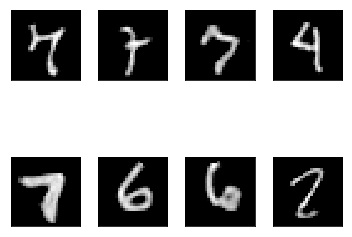

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("some images recreated by the model:")
plt.figure(figsize=(5, 5))
for i in range(8):
    plt.subplot(2, 4, i+1)
    img = mpimg.imread('result'+str(i)+'.png')
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout() 
plt.show()